In [36]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
np.random.seed(42)

In [37]:
csv_path = "../../../../../../data/kaggle/"

In [38]:
df_partner_headlines = pd.read_csv(csv_path + "raw_partner_headlines.csv", low_memory=False, parse_dates=True)

df_partner_headlines["date"] = pd.to_datetime(df_partner_headlines["date"])

In [39]:
df_partner_headlines = df_partner_headlines.loc['2010-01-01':'2021-01-01']

In [40]:
df_analyst_ratings_processed = pd.read_csv(csv_path + "analyst_ratings_processed.csv", low_memory=False, parse_dates=True)

In [41]:
df_partner_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 201000 to 202099
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1100 non-null   int64         
 1   headline    1100 non-null   object        
 2   url         1100 non-null   object        
 3   publisher   1100 non-null   object        
 4   date        1100 non-null   datetime64[ns]
 5   stock       1100 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 51.7+ KB


In [42]:
df_analyst_ratings_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400469 entries, 0 to 1400468
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1399180 non-null  float64
 1   title       1400469 non-null  object 
 2   date        1399180 non-null  object 
 3   stock       1397891 non-null  object 
dtypes: float64(1), object(3)
memory usage: 42.7+ MB


In [43]:
df_partner_headlines[df_partner_headlines["stock"]=="AAPL"].head()

,Unnamed: 0,headline,url,publisher,date,stock


In [44]:
df_partner_headlines

,Unnamed: 0,headline,url,publisher,date,stock
201000,201517,"Buy Intel, Microsoft as They Prepare Assault o...",http://www.thestreet.com/story/11515895/1/buy-...,TheStreet.Com,2012-05-01,BKS
201001,201518,"Buy Intel, Microsoft as They Prepare Assault o...",https://www.benzinga.com/content/thestreet-com...,webmaster,2012-05-01,BKS
201002,201519,7 Hot Stocks on Traders' Radars,https://www.benzinga.com/content/thestreet-com...,webmaster,2012-05-01,BKS
201003,201520,Whitney Tilson on Trading Barnes and Noble,http://www.gurufocus.com/news/173580/whitney-t...,GuruFocus,2012-05-01,BKS
201004,201521,Barnes & Noble -- A Premature Celebration,http://www.thestreet.com/story/11515636/1/barn...,TheStreet.Com,2012-05-01,BKS
...,...,...,...,...,...,...
202095,202621,Looking For Diogenes' Portfolio Update: Cempra...,http://seekingalpha.com/article/3364575-lookin...,Seeking Alpha,2015-07-28,BLCM
202096,202622,CAR-T stocks set for opening gap up in concert...,http://seekingalpha.com/news/2606335-car-t-sto...,Seeking Alpha,2015-06-30,BLCM
202097,202623,After Hours Gainers / Losers,http://seekingalpha.com/news/2605705-after-hou...,Seeking Alpha,2015-06-29,BLCM
202098,202624,Cancer Stock Juno Therapeutics (JUNO): What's ...,http://www.smallcapnetwork.com/Cancer-Stock-Ju...,Small Cap Network,2015-06-26,BLCM


In [45]:
df_partner_headlines.set_index("date", inplace=True)

In [46]:
df_partner_headlines.sort_values(by=["date"], ascending=True, inplace=True)

In [47]:
df_analyst_ratings_processed_aapl = df_analyst_ratings_processed[df_analyst_ratings_processed["stock"]=="AAPL"]

In [48]:
df_analyst_ratings_processed[df_analyst_ratings_processed["stock"]=="AAPL"]

,Unnamed: 0,title,date,stock
3668,7120.0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10 11:33:00-04:00,AAPL
3669,7121.0,10 Biggest Price Target Changes For Wednesday,2020-06-10 08:14:00-04:00,AAPL
3670,7122.0,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10 07:53:00-04:00,AAPL
3671,7123.0,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10 07:19:00-04:00,AAPL
3672,7124.0,Apple To Let Users Trade In Their Mac Computer...,2020-06-10 06:27:00-04:00,AAPL
...,...,...,...,...
4132,7585.0,"UBS Maintains Buy on Apple, Lowers Price Targe...",2020-03-10 07:06:00-04:00,AAPL
4133,7586.0,123 Biggest Movers From Yesterday,2020-03-10 05:57:00-04:00,AAPL
4134,7587.0,Crude Awakening: Energy Sector Takes A 20% Spi...,2020-03-09 17:09:00-04:00,AAPL
4135,7588.0,Investor Movement Index Summary: February 2020,2020-03-09 13:57:00-04:00,AAPL


In [49]:
df_groupedby_date = df_analyst_ratings_processed_aapl.groupby('date').count()
df_groupedby_date.reset_index(inplace=True)
df_groupedby_date.set_index("date", inplace=True)
df_groupedby_date = df_groupedby_date[["stock"]]
# plt.plot_date(x=df_groupedby_date['date'], y=df_groupedby_date['stock'])


In [50]:
df_groupedby_date

,stock
date,
2020-03-09 12:00:00-04:00,1
2020-03-09 13:57:00-04:00,1
2020-03-09 17:09:00-04:00,1
2020-03-10 05:57:00-04:00,1
2020-03-10 07:06:00-04:00,1
...,...
2020-06-10 06:27:00-04:00,1
2020-06-10 07:19:00-04:00,1
2020-06-10 07:53:00-04:00,1


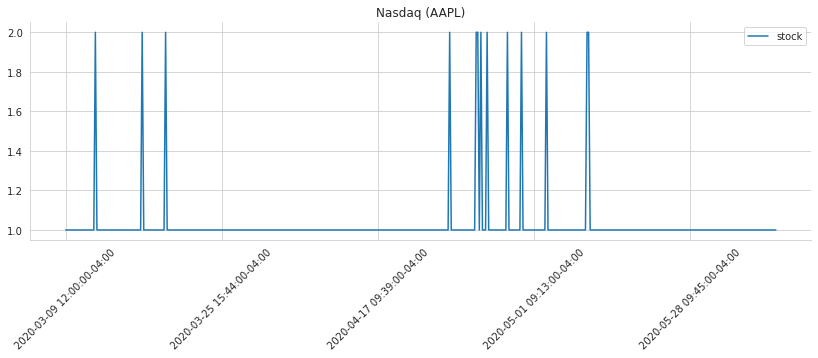

In [52]:
ax = df_groupedby_date['stock'].plot(title='Nasdaq (AAPL)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

In [ ]:
df_groupedby_date

,headline
date,
2010-02-23,4
2010-02-26,2
2010-03-10,1
2010-03-11,1
2010-03-15,1
...,...
2020-04-08,1
2020-04-15,1
2020-04-30,2


In [ ]:
df_groupedby_date.describe()

,headline
count,718.000000
mean,1.532033
std,1.376614
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,22.000000


In [ ]:
df_partner_headlines.plot(x=df_partner_headlines.index, data=df_partner_headlines)

KeyError: "None of [DatetimeIndex(['2010-02-23', '2010-02-23', '2010-02-23', '2010-02-23',\n               '2010-02-26', '2010-02-26', '2010-03-10', '2010-03-11',\n               '2010-03-15', '2010-03-18',\n               ...\n               '2020-02-28', '2020-03-05', '2020-03-12', '2020-03-18',\n               '2020-04-08', '2020-04-15', '2020-04-30', '2020-04-30',\n               '2020-05-04', '2020-05-27'],\n              dtype='datetime64[ns]', name='date', length=1100, freq=None)] are in the [columns]"